<a href="https://colab.research.google.com/github/AphiweJoko/Bias_Audit_AdultIncome/blob/main/Bias_Audit_AdultIncome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install pandas numpy seaborn matplotlib scikit-learn aif360 fairlearn



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 9.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

# Load and clean dataset
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                'marital-status', 'occupation', 'relationship', 'race', 'sex',
                'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

df = pd.read_csv(url, header=None, names=column_names, na_values=' ?', skipinitialspace=True)
df.head()

#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
#columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
#           'marital-status', 'occupation', 'relationship', 'race', 'sex',
 #          'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

#df = pd.read_csv(url, header=None, names=columns, na_values=' ?')
#df.dropna(inplace=True)
#df['income'] = df['income'].apply(lambda x: 1 if '>50K' in x else 0)



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# Drop missing values
df = df.dropna()

# Show outcome distribution
df['income'].value_counts()


,count
income,
<=50K,24720
>50K,7841


In [ ]:
# Check demographic breakdown
print(df['sex'].value_counts())
print(df['race'].value_counts())


sex
Male      21790
Female    10771
Name: count, dtype: int64
race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64


In [ ]:
!pip install seaborn

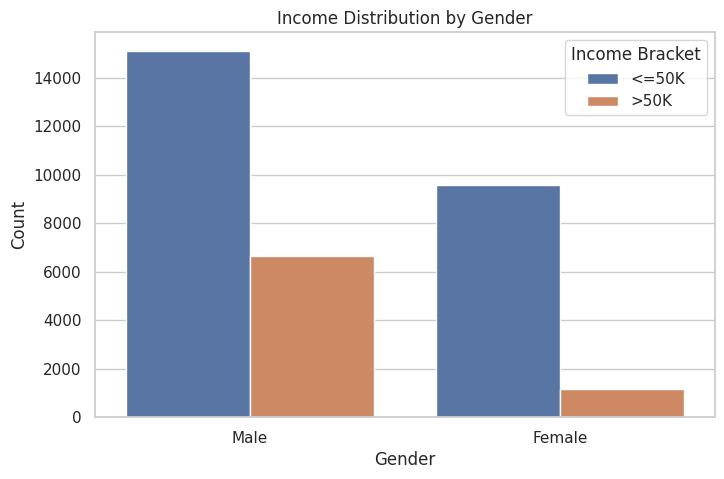

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots display in notebook
%matplotlib inline

# Load dataset (if not already loaded)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                'marital-status', 'occupation', 'relationship', 'race', 'sex',
                'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

df = pd.read_csv(url, header=None, names=column_names, na_values=' ?', skipinitialspace=True)

# Clean missing values
df = df.dropna()

# Set up chart style
sns.set(style="whitegrid")

# Plot count of income by gender
plt.figure(figsize=(8, 5))
sns.countplot(x='sex', hue='income', data=df)
plt.title("Income Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Income Bracket")
plt.show()


In [ ]:
# Install Fairlearn if not already installed
!pip install -q fairlearn

# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from fairlearn.metrics import (
    MetricFrame,
    selection_rate,
    true_positive_rate,
    false_positive_rate,
    demographic_parity_difference,
    equalized_odds_difference
)


In [ ]:
# Income rate for each gender
gender_income = pd.crosstab(df['sex'], df['income'], normalize='index')
print("Proportion earning >50K by gender:")
print(gender_income)

# Income rate for each race
race_income = pd.crosstab(df['race'], df['income'], normalize='index')
print("\nProportion earning >50K by race:")
print(race_income)


Proportion earning >50K by gender:
income     <=50K      >50K
sex                       
Female  0.890539  0.109461
Male    0.694263  0.305737

Proportion earning >50K by race:
income                 <=50K      >50K
race                                  
Amer-Indian-Eskimo  0.884244  0.115756
Asian-Pac-Islander  0.734360  0.265640
Black               0.876120  0.123880
Other               0.907749  0.092251
White               0.744140  0.255860


In [ ]:
# Encode target variable
df['income_binary'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Use features and target
X = df.drop(columns=['income', 'income_binary'])  # keep all non-target features
X = pd.get_dummies(X, drop_first=True)  # one-hot encode categorical features
y = df['income_binary']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identify protected attribute for fairness audit (e.g., sex)
protected_attr = df.loc[X_test.index, 'sex']  # we'll audit bias by gender



In [ ]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
# Create MetricFrame for multiple metrics
mf = MetricFrame(
    metrics={
        'Selection Rate': selection_rate,
        'True Positive Rate': true_positive_rate,
        'False Positive Rate': false_positive_rate
    },
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=protected_attr
)

print("Fairness Metrics by Gender Group:\n")
print(mf.by_group)

# Also print metric differences
print("\nMetric Differences Between Groups:\n")
print(mf.difference())


Fairness Metrics by Gender Group:

        Selection Rate  True Positive Rate  False Positive Rate
sex                                                            
Female        0.050957            0.258824             0.026570
Male          0.103200            0.264438             0.033355

Metric Differences Between Groups:

Selection Rate         0.052243
True Positive Rate     0.005614
False Positive Rate    0.006785
dtype: float64


In [ ]:
# Demographic Parity Difference (Statistical Parity)
dp_diff = demographic_parity_difference(y_test, y_pred, sensitive_features=protected_attr)

# Equal Opportunity Difference (TPR difference)
eo_diff = equalized_odds_difference(y_test, y_pred, sensitive_features=protected_attr)

print(f"Demographic Parity Difference: {dp_diff:.3f}")
print(f"Equal Opportunity Difference: {eo_diff:.3f}")


Demographic Parity Difference: 0.052
Equal Opportunity Difference: 0.007


In [ ]:
from fairlearn.reductions import ExponentiatedGradient, DemographicParity, EqualizedOdds
from sklearn.linear_model import LogisticRegression


In [ ]:
from fairlearn.reductions import ExponentiatedGradient, DemographicParity
from sklearn.linear_model import LogisticRegression

# Reuse previously prepared data
X_train_fair = X_train.copy()
y_train_fair = y_train.copy()
sensitive_features_train = df.loc[X_train.index, 'sex']

# Apply bias mitigation WITHOUT random_state
fair_model = ExponentiatedGradient(
    estimator=LogisticRegression(solver='liblinear'),
    constraints=DemographicParity()
)

# Train fair model
fair_model.fit(X_train_fair, y_train_fair, sensitive_features=sensitive_features_train)


ExponentiatedGradient(constraints=<fairlearn.reductions._moments.utility_parity.DemographicParity object at 0x79f32405fc10>,
                      estimator=LogisticRegression(solver='liblinear'),
                      nu=np.float64(0.0013354196933783571))

In [ ]:
# Predict on X_test
y_pred_fair = fair_model.predict(X_test)

# Evaluate fairness metrics again
protected_attr_test = df.loc[X_test.index, 'sex']

mf_fair = MetricFrame(
    metrics={
        'Selection Rate': selection_rate,
        'True Positive Rate': true_positive_rate,
        'False Positive Rate': false_positive_rate
    },
    y_true=y_test,
    y_pred=y_pred_fair,
    sensitive_features=protected_attr_test
)

print("Fairness Metrics AFTER Mitigation:\n")
print(mf_fair.by_group)
print("\nMetric Differences:\n")
print(mf_fair.difference())


Fairness Metrics AFTER Mitigation:

        Selection Rate  True Positive Rate  False Positive Rate
sex                                                            
Female        0.054972            0.235294             0.033816
Male          0.079467            0.218338             0.019311

Metric Differences:

Selection Rate         0.024495
True Positive Rate     0.016956
False Positive Rate    0.014505
dtype: float64


In [ ]:
# Compare Selection Rate
before_sr = mf.by_group['Selection Rate']
after_sr = mf_fair.by_group['Selection Rate']

print("Selection Rate Comparison:\n")
print(pd.DataFrame({'Before': before_sr, 'After': after_sr}))


Selection Rate Comparison:

          Before     After
sex                       
Female  0.050957  0.054972
Male    0.103200  0.079467


In [ ]:
# Compare Selection Rate
selection_rate_comparison = pd.DataFrame({
    'Original Model': mf.by_group['Selection Rate'],
    'Mitigated Model': mf_fair.by_group['Selection Rate']
})
print("📊 Selection Rate Comparison:")
print(selection_rate_comparison)

# Compare True Positive Rate
tpr_comparison = pd.DataFrame({
    'Original Model': mf.by_group['True Positive Rate'],
    'Mitigated Model': mf_fair.by_group['True Positive Rate']
})
print("\n📊 True Positive Rate Comparison:")
print(tpr_comparison)


📊 Selection Rate Comparison:
        Original Model  Mitigated Model
sex                                    
Female        0.050957         0.054972
Male          0.103200         0.079467

📊 True Positive Rate Comparison:
        Original Model  Mitigated Model
sex                                    
Female        0.258824         0.235294
Male          0.264438         0.218338


In [ ]:
# Setup new fairness-aware model
fair_model_eqodds = ExponentiatedGradient(
    estimator=LogisticRegression(solver='liblinear'),
    constraints=EqualizedOdds()
)

# Train model using same train set and sensitive features
fair_model_eqodds.fit(X_train, y_train, sensitive_features=sensitive_features_train)


ExponentiatedGradient(constraints=<fairlearn.reductions._moments.utility_parity.EqualizedOdds object at 0x79f32331bf90>,
                      estimator=LogisticRegression(solver='liblinear'),
                      nu=np.float64(0.0013355262400494186))

In [ ]:
# Predict
y_pred_eqodds = fair_model_eqodds.predict(X_test)

# Recalculate metrics
mf_eqodds = MetricFrame(
    metrics={
        'Selection Rate': selection_rate,
        'True Positive Rate': true_positive_rate,
        'False Positive Rate': false_positive_rate
    },
    y_true=y_test,
    y_pred=y_pred_eqodds,
    sensitive_features=protected_attr_test
)

# Output results
print("Fairness Metrics with Equalized Odds:\n")
print(mf_eqodds.by_group)
print("\nMetric Differences:\n")
print(mf_eqodds.difference())


Fairness Metrics with Equalized Odds:

        Selection Rate  True Positive Rate  False Positive Rate
sex                                                            
Female        0.055590            0.241176             0.033816
Male          0.124024            0.283181             0.055080

Metric Differences:

Selection Rate         0.068434
True Positive Rate     0.042005
False Positive Rate    0.021264
dtype: float64


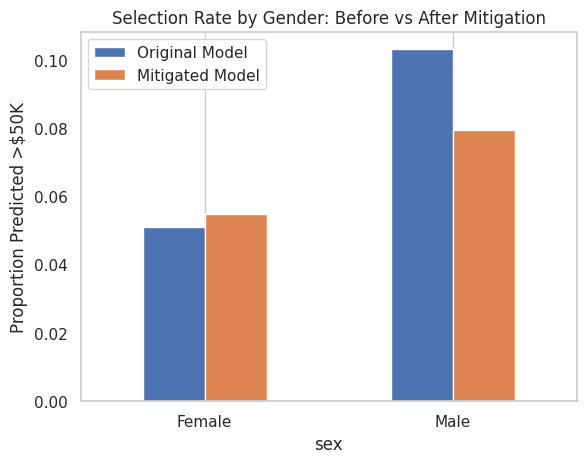

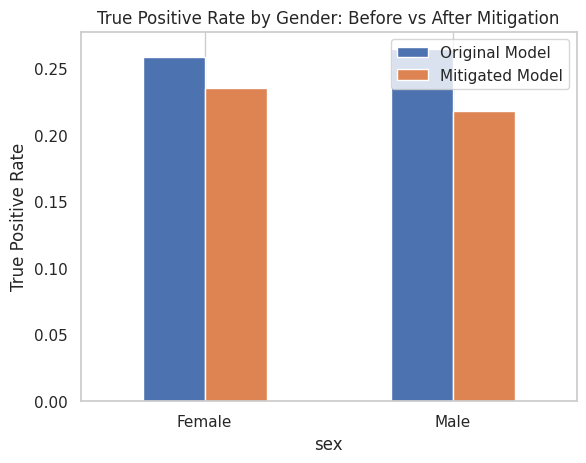

In [ ]:
import matplotlib.pyplot as plt

# Plot Selection Rate
selection_rate_comparison.plot(kind='bar')
plt.title('Selection Rate by Gender: Before vs After Mitigation')
plt.ylabel('Proportion Predicted >$50K')
plt.xticks([0, 1], labels=['Female', 'Male'], rotation=0)
plt.grid(axis='y')
plt.show()

# Plot True Positive Rate
tpr_comparison.plot(kind='bar')
plt.title('True Positive Rate by Gender: Before vs After Mitigation')
plt.ylabel('True Positive Rate')
plt.xticks([0, 1], labels=['Female', 'Male'], rotation=0)
plt.grid(axis='y')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

# Accuracy before mitigation
acc_orig = accuracy_score(y_test, y_pred)

# Accuracy after mitigation
acc_fair = accuracy_score(y_test, y_pred_fair)

print(f"Original Accuracy: {acc_orig:.3f}")
print(f"Mitigated Accuracy: {acc_fair:.3f}")


Original Accuracy: 0.802
Mitigated Accuracy: 0.796


In [ ]:
print("""
Real-World Implications and Harms of Bias in Income Prediction Models

The bias discovered in the income prediction model - particularly toward gender and race - can have serious real-world consequences when such models are deployed in socio-economic decision-making.

Discrimination in Hiring and Credit Decisions:
Automated income prediction models are often used in contexts like job screening, loan approvals, or government assistance programs. If the model disproportionately predicts lower income for women or minority groups, it can reinforce historical inequalities and deny individuals access to opportunities or financial services.

Reinforcement of Societal Inequality:
The UCI Adult dataset reflects systemic biases present in historical income distributions. Training models on such data without mitigation can legitimize these disparities, contributing to a feedback loop where marginalized groups remain disadvantaged by data-driven systems.

Lack of Trust and Transparency:
When people are affected by algorithmic decisions without understanding the logic or noticing unfair patterns, it erodes trust in institutions that use AI. This can lead to social backlash, legal challenges, and reduced adoption of potentially beneficial technology.

Perpetuation of Legacy Biases:
Unless audited and mitigated, machine learning models tend to learn and perpetuate existing societal patterns - including unjust ones. Biases in training data can propagate into real-world deployments, making the algorithm part of the problem rather than a tool for equity.

Therefore, bias audits and fairness-aware model design are critical to ensuring machine learning systems are ethical, responsible, and inclusive in real-world applications.
""")



Real-World Implications and Harms of Bias in Income Prediction Models

The bias discovered in the income prediction model - particularly toward gender and race - can have serious real-world consequences when such models are deployed in socio-economic decision-making.

Discrimination in Hiring and Credit Decisions:
Automated income prediction models are often used in contexts like job screening, loan approvals, or government assistance programs. If the model disproportionately predicts lower income for women or minority groups, it can reinforce historical inequalities and deny individuals access to opportunities or financial services.

Reinforcement of Societal Inequality:
The UCI Adult dataset reflects systemic biases present in historical income distributions. Training models on such data without mitigation can legitimize these disparities, contributing to a feedback loop where marginalized groups remain disadvantaged by data-driven systems.

Lack of Trust and Transparency:
When peop

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Ensure the dataset is already loaded — if not, reload it:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation',
           'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
df = pd.read_csv(url, names=columns, skipinitialspace=True, na_values=" ?")
df = df.dropna()

# Chi-Square test between gender and income
contingency = pd.crosstab(df['sex'], df['income'])
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"p-value: {p:.4f}")

if p < 0.05:
    print("✅ Statistically significant association between gender and income → potential bias.")
else:
    print("⚠️ No statistically significant association detected.")


Chi-square statistic: 1517.8134
Degrees of freedom: 1
p-value: 0.0000
✅ Statistically significant association between gender and income → potential bias.


In [ ]:
print("""
Recommendations for Improving the Dataset

1. Address Class Imbalance:
- Use SMOTE or resampling to balance gender and income classes.

2. Improve Feature Representation:
- Combine sparse or ambiguous categories for features like 'workclass' and 'native-country'.

3. Handle Missing Data More Effectively:
- Instead of dropping missing values, apply informed imputation to retain underrepresented cases.

4. Update Income Threshold:
- Replace outdated $50K threshold with a continuous or regionally adjusted income variable.

5. Enrich Demographic Features:
- Integrate additional features (e.g., education quality, geography) using external socioeconomic data.

These improvements will help reduce bias and improve fairness in predictive modeling tasks.
""")



Recommendations for Improving the Dataset

1. Address Class Imbalance:
- Use SMOTE or resampling to balance gender and income classes.

2. Improve Feature Representation:
- Combine sparse or ambiguous categories for features like 'workclass' and 'native-country'.

3. Handle Missing Data More Effectively:
- Instead of dropping missing values, apply informed imputation to retain underrepresented cases.

4. Update Income Threshold:
- Replace outdated $50K threshold with a continuous or regionally adjusted income variable.

5. Enrich Demographic Features:
- Integrate additional features (e.g., education quality, geography) using external socioeconomic data.

These improvements will help reduce bias and improve fairness in predictive modeling tasks.



In [ ]:
print("""
Ethics Framework for Income Prediction Models

1. Fairness and Non-Discrimination:
Ensure the model treats all demographic groups equitably. Use fairness metrics and mitigation strategies to avoid reinforcing historical bias.

2. Transparency and Explainability:
Make model logic interpretable and accessible. Avoid black-box decision-making in high-stakes scenarios.

3. Accountability and Governance:
Implement review processes, feedback loops, and model monitoring. Data teams must be accountable for outcomes and impact.

4. Data Ethics and Informed Consent:
Use datasets that respect privacy and represent diverse populations. Disclose known biases and limitations.

5. Social Impact Awareness:
Understand how predictions affect individuals, especially marginalized groups. Design policies to reduce harm and avoid over-reliance on automated decisions.

This framework ensures ethical deployment of AI in income prediction and similar high-impact use cases.
""")



Ethics Framework for Income Prediction Models

1. Fairness and Non-Discrimination:
Ensure the model treats all demographic groups equitably. Use fairness metrics and mitigation strategies to avoid reinforcing historical bias.

2. Transparency and Explainability:
Make model logic interpretable and accessible. Avoid black-box decision-making in high-stakes scenarios.

3. Accountability and Governance:
Implement review processes, feedback loops, and model monitoring. Data teams must be accountable for outcomes and impact.

4. Data Ethics and Informed Consent:
Use datasets that respect privacy and represent diverse populations. Disclose known biases and limitations.

5. Social Impact Awareness:
Understand how predictions affect individuals, especially marginalized groups. Design policies to reduce harm and avoid over-reliance on automated decisions.

This framework ensures ethical deployment of AI in income prediction and similar high-impact use cases.

